<a href="https://colab.research.google.com/github/SanjayNithin2002/phishing-detection-api/blob/main/phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [402]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import statsmodels.api as sm
from google.colab import drive
import matplotlib
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [403]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [404]:
df = pd.read_csv("/content/drive/MyDrive/dataset_website.csv")
df = df.drop(['index'], axis=1)

In [405]:
df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [406]:
df.isnull()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11052,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11053,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [407]:
df.isnull().sum()

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [408]:
df.isnull().sum().sum()

0

In [409]:
df.max()[df.max() > 0].index

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [411]:
df.head

<bound method NDFrame.head of        having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0                              -1              1                   1   
1                               1              1                   1   
2                               1              0                   1   
3                               1              0                   1   
4                               1              0                  -1   
...                           ...            ...                 ...   
11050                           1             -1                   1   
11051                          -1              1                   1   
11052                           1             -1                   1   
11053                          -1             -1                   1   
11054                          -1             -1                   1   

       having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                     1              

In [412]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,0.0,0.5,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.5,0.0,1.0,1.0,1.0,0.0
2,1.0,0.5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.5,0.0,0.0
3,1.0,0.5,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.5,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
11051,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
11052,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.5,1.0,0.0
11053,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [413]:
normalized_df = df
y = normalized_df["Result"]
X = normalized_df.iloc[: , :-1]

In [414]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
# search about this

Best alpha using built-in LassoCV: 0.000647
Best score using built-in LassoCV: 0.702951


In [415]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 29 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

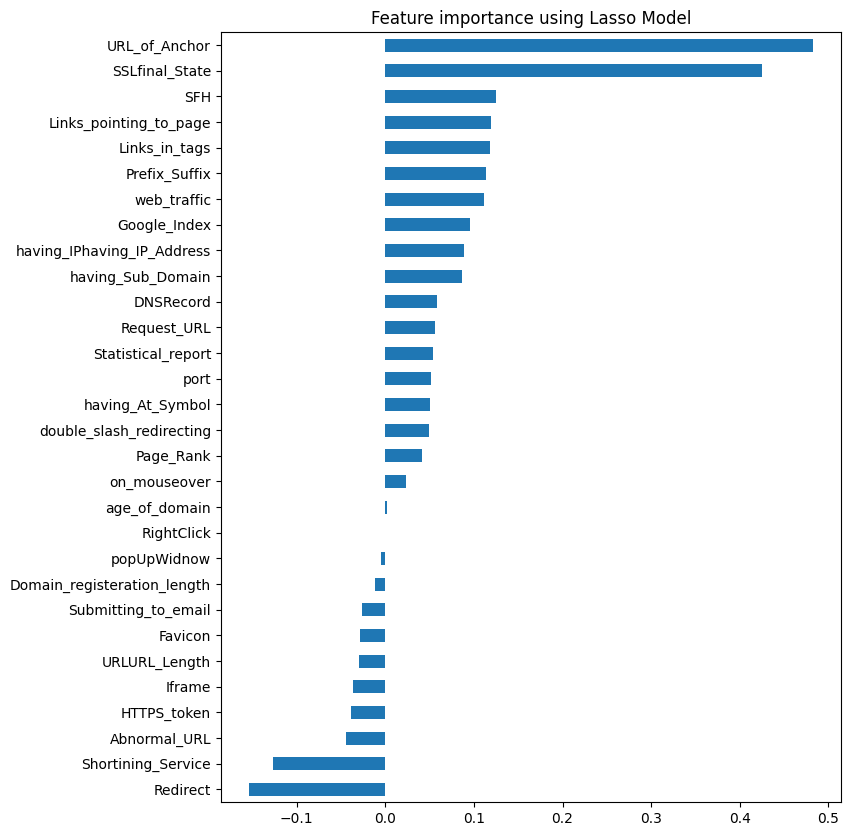

In [416]:
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [417]:
imp_coef

Redirect                      -0.153590
Shortining_Service            -0.126848
Abnormal_URL                  -0.044306
HTTPS_token                   -0.038456
Iframe                        -0.036239
URLURL_Length                 -0.029488
Favicon                       -0.028734
Submitting_to_email           -0.025735
Domain_registeration_length   -0.011170
popUpWidnow                   -0.004753
RightClick                     0.000000
age_of_domain                  0.001973
on_mouseover                   0.023662
Page_Rank                      0.042024
double_slash_redirecting       0.049801
having_At_Symbol               0.051073
port                           0.051513
Statistical_report             0.054334
Request_URL                    0.056549
DNSRecord                      0.058001
having_Sub_Domain              0.086676
having_IPhaving_IP_Address     0.088560
Google_Index                   0.095708
web_traffic                    0.111861
Prefix_Suffix                  0.113208


In [418]:
imp_features = imp_coef[imp_coef != 0].index
df = normalized_df[imp_coef[imp_coef != 0].index]

In [419]:
pca = PCA(n_components=20)
df = pca.fit_transform(df)

In [420]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state=42)

In [421]:
svm_model = svm.SVC().fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
svm_ascore = accuracy_score(y_test, y_pred,normalize = True)
svm_score = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Calculate the confusion matrix of the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
tn, fp, fn, tp = conf_matrix.ravel()
error_rate = (fp + fn) / (tn + fp + fn + tp)
print(error_rate)
# Generate a classification report of the model
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[ 883   73]
 [  42 1213]]
0.05201266395296246
Classification Report:
               precision    recall  f1-score   support

          -1       0.95      0.92      0.94       956
           1       0.94      0.97      0.95      1255

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



In [422]:
lr_model = LogisticRegression(random_state=0, multi_class = "ovr").fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
lr_ascore = accuracy_score(y_test, y_pred,normalize = True)
lr_score = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Calculate the confusion matrix of the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
tn, fp, fn, tp = conf_matrix.ravel()
error_rate = (fp + fn) / (tn + fp + fn + tp)
print(error_rate)
# Generate a classification report of the model
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[ 861   95]
 [  70 1185]]
0.07462686567164178
Classification Report:
               precision    recall  f1-score   support

          -1       0.92      0.90      0.91       956
           1       0.93      0.94      0.93      1255

    accuracy                           0.93      2211
   macro avg       0.93      0.92      0.92      2211
weighted avg       0.93      0.93      0.93      2211



In [423]:
rfc_model = RandomForestClassifier(max_depth=100, random_state=0).fit(X_train,y_train)
y_pred = rfc_model.predict(X_test)
rfc_ascore = accuracy_score(y_test,y_pred,normalize=True)
rfc_score = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Calculate the confusion matrix of the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
tn, fp, fn, tp = conf_matrix.ravel()
error_rate = (fp + fn) / (tn + fp + fn + tp)
print(error_rate)
# Generate a classification report of the model
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[ 896   60]
 [  31 1224]]
0.04115784712799638
Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.94      0.95       956
           1       0.95      0.98      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [424]:
clf = AdaBoostClassifier(n_estimators=50).fit(X_train, y_train)
y_pred = clf.predict(X_test)
ada_ascore = accuracy_score(y_test,y_pred,normalize=True)
ada_score = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Calculate the confusion matrix of the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
tn, fp, fn, tp = conf_matrix.ravel()
error_rate = (fp + fn) / (tn + fp + fn + tp)
print(error_rate)
# Generate a classification report of the model
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[ 846  110]
 [  85 1170]]
0.08819538670284939
Classification Report:
               precision    recall  f1-score   support

          -1       0.91      0.88      0.90       956
           1       0.91      0.93      0.92      1255

    accuracy                           0.91      2211
   macro avg       0.91      0.91      0.91      2211
weighted avg       0.91      0.91      0.91      2211



In [425]:
estimators=[('svm', svm_model), ('rf', rfc_model), ('logreg', lr_model), ('ada', clf)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
voting_ascore = accuracy_score(y_test,y_pred,normalize=True)
voting_score = precision_recall_fscore_support(y_test, y_pred, average='macro')
# Calculate the confusion matrix of the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
tn, fp, fn, tp = conf_matrix.ravel()
error_rate = (fp + fn) / (tn + fp + fn + tp)
print(error_rate)
# Generate a classification report of the model
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[ 885   71]
 [  58 1197]]
0.05834464043419267
Classification Report:
               precision    recall  f1-score   support

          -1       0.94      0.93      0.93       956
           1       0.94      0.95      0.95      1255

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



In [426]:
labels = ['SupportVectorMachine', 'Logistic Regression', 'Random Forest', 'AdaBoost', 'Voting']
accuracy_scores = [svm_ascore, lr_ascore, rfc_ascore, ada_ascore, voting_ascore]
precision_scores = [svm_score[0], lr_score[0], rfc_score[0], ada_score[0], voting_score[0]]
recall_scores = [svm_score[1], lr_score[1], rfc_score[1], ada_score[1], voting_score[1]]
f1_scores = [svm_score[2], lr_score[2], rfc_score[2], ada_score[2], voting_score[2]]

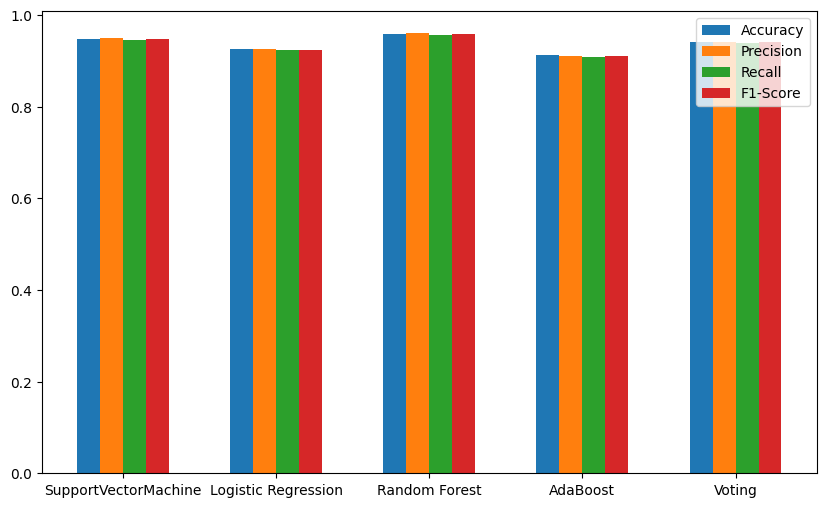

In [427]:
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width*1.5, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x - width/2, precision_scores, width, label='Precision')
rects3 = ax.bar(x + width/2, recall_scores, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1_scores, width, label='F1-Score')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()